In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import spacy
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from sklearn.utils import shuffle
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eramalam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [137]:
# Text-Vector Imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Model Imports
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, f1_score
from sklearn.svm import LinearSVC
import xgboost as xgb

# Keras Imports
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import Bidirectional

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
df_fake = pd.read_csv('Fake.csv')

In [5]:
df_true = pd.read_csv('True.csv')

In [6]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
df_fake['label'] = 0

Creating label 0 for fake news.

In [8]:
df_fake = shuffle(df_fake)

In [9]:
df_fake = df_fake.head(int(len(df_fake)*(75/100)))

In [10]:
df_fake

,title,text,subject,date,label
19677,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,This is truly a chilling story of organized vo...,left-news,"Nov 4, 2016",0
1773,WATCH: SNL BRUTALLY Mocks The Kushner/Bannon ...,"Saturday Night Live is back with new episodes,...",News,"April 16, 2017",0
4817,MAJOR Latino Supporter Publicly Dumps Trump O...,While many racist Donald Trump supporters are ...,News,"September 1, 2016",0
21403,CA Middle School Won’t Release Student Council...,Your daily dose of insanity A San Francisco mi...,left-news,"Oct 20, 2015",0
18287,"REAL INDIAN, GOP Senate Hopeful Shiva Ayyadura...","Mass Live Ayyadurai, who announced his Republ...",left-news,"Jul 20, 2017",0
...,...,...,...,...,...
13784,KING OBAMA Just Proclaimed The Month Of June W...,So let it be said so let it be done.I don t re...,politics,"May 31, 2016",0
7251,WATCH: New ‘Birdie’ Sanders Ad Celebrates RES...,"Bernie Sanders is on fire, especially after th...",News,"March 27, 2016",0
17672,MEGYN KELLY PRAISES Woman Who Flipped Off Trum...,NBC host Megyn Kelly must be really desperate ...,left-news,"Nov 9, 2017",0
2931,WOW: Intercepted Communications Implicate Thr...,"By now, you have probably heard that the FBI a...",News,"January 20, 2017",0


In [11]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [12]:
df_true['label'] = 1

Creating label 1 for true news.

In [13]:
df_true = shuffle(df_true)

In [14]:
df_true = df_true.head(int(len(df_true)*(75/100)))

In [15]:
df_true

,title,text,subject,date,label
1035,Senator Flake expects more Republicans to deno...,WASHINGTON (Reuters) - U.S. Senator Jeff Flake...,politicsNews,"October 25, 2017",1
14085,U.S. calling Rohingya operation 'ethnic cleans...,YANGON (Reuters) - The U.S. labeling of a Myan...,worldnews,"November 23, 2017",1
7273,U.S. internet firms ask Trump to support encry...,WASHINGTON (Reuters) - U.S. internet companies...,politicsNews,"November 14, 2016",1
12167,Battle lines drawn for South Africa's ANC on e...,JOHANNESBURG (Reuters) - The African National ...,worldnews,"December 15, 2017",1
5767,Senate panel advances Trump's nominee for atto...,WASHINGTON (Reuters) - The U.S. Senate Judicia...,politicsNews,"February 1, 2017",1
...,...,...,...,...,...
10581,Senate's McConnell condemns white supremacists,WASHINGTON (Reuters) - Senate Majority Leader ...,politicsNews,"March 1, 2016",1
3592,"Vermont governor snuffs legal pot, tells lawma...",(Reuters) - Vermont’s governor on Wednesday ha...,politicsNews,"May 24, 2017",1
20116,Soldiers on Europe's streets dent NATO's defen...,BRUSSELS (Reuters) - The use of armed soldiers...,worldnews,"September 14, 2017",1
1247,"Republican Collins will stay in U.S. Senate, f...",(Reuters) - U.S. Senator Susan Collins of Main...,politicsNews,"October 13, 2017",1


I have decided to shorten the fake and true news datasets for quicker processing later on. However, since the original dataset was ordered such that all the news articles from the same subject were put together, I shuffled both the datasets first to ensure I mix up the data points before taking the first 75% of the datasets to comprise the new true and fake news datasets.

In [81]:
def clean_text(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [82]:
df_true['text'] = df_true['text'].apply(lambda x: clean_text(x))

In [83]:
df_fake['text'] = df_fake['text'].apply(lambda x: clean_text(x))

In [84]:
frames = [df_fake, df_true]
df = pd.concat(frames, axis=0)

In [85]:
df

,title,text,subject,date,label
22948,Boiler Room #101 – St. Patrick’s Cyber-pocalyp...,Tune Alternate Current Radio Network (ACR) ano...,Middle-east,"March 17, 2017",0
22962,EP #16: Patrick Henningsen LIVE – ‘Official Wa...,Join Patrick every Wednesday Independent Talk ...,Middle-east,"March 9, 2017",0
11716,BREAKING #BetsyDeVos CONFIRMED: DEMOCRATS SEET...,Watch History making!@VP breaks TIE confirm Be...,politics,"Feb 7, 2017",0
17452,A MUST READ: OBAMA’S TREASON GOES INTO OVERDRIVE,Our culture makes Nation great exceptional. Un...,Government News,"Apr 6, 2015",0
19362,BREAKING: FORD ANNOUNCES $700 Million U.S. Inv...,,left-news,"Jan 3, 2017",0
...,...,...,...,...,...
2979,Financial adviser sentenced to four years for ...,SAN ANTONIO (Reuters) - A wine industry busine...,politicsNews,"June 28, 2017",1
12737,Russia's Lavrov: U.S. decision on Jerusalem co...,VIENNA (Reuters) - Russian Foreign Minister Se...,worldnews,"December 8, 2017",1
18014,France would not recognize unilateral Catalan ...,PARIS (Reuters) - France recognize Catalonia S...,worldnews,"October 9, 2017",1
1662,"Republican Senators Corker, Toomey reach deal ...",WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"September 20, 2017",1


In [86]:
df.to_csv('no_stop.csv')

This is the combined dataset of the fake and true news articles that I will be preprocessing and using for the models later on. As a personal preference, I have decided to remove stop words here on the two datasets separately instead of doing it on the combined longer dataset and created a new .csv file with the stop words removed so I do not need to keep re-running the above code. Please feel free to read the new .csv file as I have submitted it as well or continue with the df created.

# Data cleaning and preprocessing

In [84]:
df = pd.read_csv('no_stop.csv')

In [85]:
df

,Unnamed: 0,title,text,subject,date,label
0,22948,Boiler Room #101 – St. Patrick’s Cyber-pocalyp...,Tune Alternate Current Radio Network (ACR) ano...,Middle-east,"March 17, 2017",0
1,22962,EP #16: Patrick Henningsen LIVE – ‘Official Wa...,Join Patrick every Wednesday Independent Talk ...,Middle-east,"March 9, 2017",0
2,11716,BREAKING #BetsyDeVos CONFIRMED: DEMOCRATS SEET...,Watch History making!@VP breaks TIE confirm Be...,politics,"Feb 7, 2017",0
3,17452,A MUST READ: OBAMA’S TREASON GOES INTO OVERDRIVE,Our culture makes Nation great exceptional. Un...,Government News,"Apr 6, 2015",0
4,19362,BREAKING: FORD ANNOUNCES $700 Million U.S. Inv...,NaN,left-news,"Jan 3, 2017",0
...,...,...,...,...,...,...
33667,2979,Financial adviser sentenced to four years for ...,SAN ANTONIO (Reuters) - A wine industry busine...,politicsNews,"June 28, 2017",1
33668,12737,Russia's Lavrov: U.S. decision on Jerusalem co...,VIENNA (Reuters) - Russian Foreign Minister Se...,worldnews,"December 8, 2017",1
33669,18014,France would not recognize unilateral Catalan ...,PARIS (Reuters) - France recognize Catalonia S...,worldnews,"October 9, 2017",1
33670,1662,"Republican Senators Corker, Toomey reach deal ...",WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"September 20, 2017",1


In [86]:
df = shuffle(df)

I shuffled the dataset to mix up the true and fake new labels.

In [87]:
df.isna().sum()

Unnamed: 0      0
title           0
text          475
subject         0
date            0
label           0
dtype: int64

In [88]:
len(df[df['title'] == ' '])

0

In [89]:
len(df[df['text'] == ' '])

0

In [90]:
df.dropna(inplace=True)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


This is done to remove the empty news text rows within the dataset.

In [91]:
df

,Unnamed: 0,title,text,subject,date,label
27793,13824,Candidates and what's at stake in Honduras pre...,TEGUCIGALPA (Reuters) - Hondurans voted Sunday...,worldnews,"November 26, 2017",1
2903,15052,BREAKING: Biden Won’t Run…Is It Because Biden ...,This announcement seems indicate Obama regime ...,politics,"Oct 21, 2015",0
16320,21173,"THE NEW SWEDEN: Rapes, Riots, Severed Heads, F...",The consequences throwing welcome mat people i...,left-news,"Jan 2, 2016",0
1075,13246,TRUMP GIRLS Give Shout Out To Crooked Hillary…...,Diamond Silk light crowd Trump rally NC. They ...,politics,"Aug 15, 2016",0
12147,2082,Republicans PROVE They Believe In Party Over ...,"Congress chest-deep leak investigations, FBI D...",News,"March 20, 2017",0
...,...,...,...,...,...,...
11503,12041,OBAMA INCITING A SECOND COLD WAR? 35 Russian D...,Reuters reports:The United States expelled 35 ...,politics,"Dec 29, 2016",0
8448,22035,SUNDAY SCREENING: ‘The War on Democracy’ (2007),"21st Century Wire says Each week, 21WIRE curat...",US_News,"August 13, 2017",0
23309,5311,White House delays revamped immigration order ...,WASHINGTON (Reuters) - The White House pushed ...,politicsNews,"February 22, 2017",1
8533,18303,WOW! Do Anti-Trump Protesters REALLY Know What...,Wow! Talk clueless! Austen Fletcher approaches...,left-news,"Jul 17, 2017",0


In [92]:
def extractsource(row):
    if (row.label == 0) | (not bool(re.search(' - ', row.text))):
        return np.nan
    else:
        return row['text'].split(' - ', 1)[0]

In [93]:
df['source'] = df.apply(extractsource, axis=1)    

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
df

,Unnamed: 0,title,text,subject,date,label,source
27793,13824,Candidates and what's at stake in Honduras pre...,TEGUCIGALPA (Reuters) - Hondurans voted Sunday...,worldnews,"November 26, 2017",1,TEGUCIGALPA (Reuters)
2903,15052,BREAKING: Biden Won’t Run…Is It Because Biden ...,This announcement seems indicate Obama regime ...,politics,"Oct 21, 2015",0,NaN
16320,21173,"THE NEW SWEDEN: Rapes, Riots, Severed Heads, F...",The consequences throwing welcome mat people i...,left-news,"Jan 2, 2016",0,NaN
1075,13246,TRUMP GIRLS Give Shout Out To Crooked Hillary…...,Diamond Silk light crowd Trump rally NC. They ...,politics,"Aug 15, 2016",0,NaN
12147,2082,Republicans PROVE They Believe In Party Over ...,"Congress chest-deep leak investigations, FBI D...",News,"March 20, 2017",0,NaN
...,...,...,...,...,...,...,...
11503,12041,OBAMA INCITING A SECOND COLD WAR? 35 Russian D...,Reuters reports:The United States expelled 35 ...,politics,"Dec 29, 2016",0,NaN
8448,22035,SUNDAY SCREENING: ‘The War on Democracy’ (2007),"21st Century Wire says Each week, 21WIRE curat...",US_News,"August 13, 2017",0,NaN
23309,5311,White House delays revamped immigration order ...,WASHINGTON (Reuters) - The White House pushed ...,politicsNews,"February 22, 2017",1,WASHINGTON (Reuters)
8533,18303,WOW! Do Anti-Trump Protesters REALLY Know What...,Wow! Talk clueless! Austen Fletcher approaches...,left-news,"Jul 17, 2017",0,NaN


I have extracted the sources that some news text rows contain, where no source is found "NaN" is returned.

In [95]:
def text_only(row):
    if (row.label == 0) | (not bool(re.search(' - ', row.text))):
        return row.text
    else:
        return row['text'].split(' - ', 1)[1]

In [96]:
df['text_no_source'] = df.apply(text_only, axis=1)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
df

,Unnamed: 0,title,text,subject,date,label,source,text_no_source
27793,13824,Candidates and what's at stake in Honduras pre...,TEGUCIGALPA (Reuters) - Hondurans voted Sunday...,worldnews,"November 26, 2017",1,TEGUCIGALPA (Reuters),Hondurans voted Sunday presidential election m...
2903,15052,BREAKING: Biden Won’t Run…Is It Because Biden ...,This announcement seems indicate Obama regime ...,politics,"Oct 21, 2015",0,NaN,This announcement seems indicate Obama regime ...
16320,21173,"THE NEW SWEDEN: Rapes, Riots, Severed Heads, F...",The consequences throwing welcome mat people i...,left-news,"Jan 2, 2016",0,NaN,The consequences throwing welcome mat people i...
1075,13246,TRUMP GIRLS Give Shout Out To Crooked Hillary…...,Diamond Silk light crowd Trump rally NC. They ...,politics,"Aug 15, 2016",0,NaN,Diamond Silk light crowd Trump rally NC. They ...
12147,2082,Republicans PROVE They Believe In Party Over ...,"Congress chest-deep leak investigations, FBI D...",News,"March 20, 2017",0,NaN,"Congress chest-deep leak investigations, FBI D..."
...,...,...,...,...,...,...,...,...
11503,12041,OBAMA INCITING A SECOND COLD WAR? 35 Russian D...,Reuters reports:The United States expelled 35 ...,politics,"Dec 29, 2016",0,NaN,Reuters reports:The United States expelled 35 ...
8448,22035,SUNDAY SCREENING: ‘The War on Democracy’ (2007),"21st Century Wire says Each week, 21WIRE curat...",US_News,"August 13, 2017",0,NaN,"21st Century Wire says Each week, 21WIRE curat..."
23309,5311,White House delays revamped immigration order ...,WASHINGTON (Reuters) - The White House pushed ...,politicsNews,"February 22, 2017",1,WASHINGTON (Reuters),The White House pushed back release new execut...
8533,18303,WOW! Do Anti-Trump Protesters REALLY Know What...,Wow! Talk clueless! Austen Fletcher approaches...,left-news,"Jul 17, 2017",0,NaN,Wow! Talk clueless! Austen Fletcher approaches...


I have decided to extract and remove the sources that some rows of the news texts contains as sources may add credibility to those news texts which may bias the model results.

In [98]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    text =  ' '.join([lemmatizer.lemmatize(t) for t in nltk.word_tokenize(text)])
    return text

In [99]:
df['text_no_source'] = df['text_no_source'].apply(lambda x: clean_text(x))

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
df

,Unnamed: 0,title,text,subject,date,label,source,text_no_source
27793,13824,Candidates and what's at stake in Honduras pre...,TEGUCIGALPA (Reuters) - Hondurans voted Sunday...,worldnews,"November 26, 2017",1,TEGUCIGALPA (Reuters),honduran voted sunday presidential election ma...
2903,15052,BREAKING: Biden Won’t Run…Is It Because Biden ...,This announcement seems indicate Obama regime ...,politics,"Oct 21, 2015",0,NaN,this announcement seems indicate obama regime ...
16320,21173,"THE NEW SWEDEN: Rapes, Riots, Severed Heads, F...",The consequences throwing welcome mat people i...,left-news,"Jan 2, 2016",0,NaN,the consequence throwing welcome mat people in...
1075,13246,TRUMP GIRLS Give Shout Out To Crooked Hillary…...,Diamond Silk light crowd Trump rally NC. They ...,politics,"Aug 15, 2016",0,NaN,diamond silk light crowd trump rally nc they r...
12147,2082,Republicans PROVE They Believe In Party Over ...,"Congress chest-deep leak investigations, FBI D...",News,"March 20, 2017",0,NaN,congress chest deep leak investigation fbi dir...
...,...,...,...,...,...,...,...,...
11503,12041,OBAMA INCITING A SECOND COLD WAR? 35 Russian D...,Reuters reports:The United States expelled 35 ...,politics,"Dec 29, 2016",0,NaN,reuters report the united state expelled russi...
8448,22035,SUNDAY SCREENING: ‘The War on Democracy’ (2007),"21st Century Wire says Each week, 21WIRE curat...",US_News,"August 13, 2017",0,NaN,st century wire say each week wire curate seri...
23309,5311,White House delays revamped immigration order ...,WASHINGTON (Reuters) - The White House pushed ...,politicsNews,"February 22, 2017",1,WASHINGTON (Reuters),the white house pushed back release new execut...
8533,18303,WOW! Do Anti-Trump Protesters REALLY Know What...,Wow! Talk clueless! Austen Fletcher approaches...,left-news,"Jul 17, 2017",0,NaN,wow talk clueless austen fletcher approach ant...


I have done some basic cleaning of the news text column which includes removing special characters, removing links, removing punctuations, removing next line symbols, making all the text lower case and lemmatizing the words in the texts so that the model will treat different forms of a word the same as they will be converted to the same base form.

# Exploratory data analysis

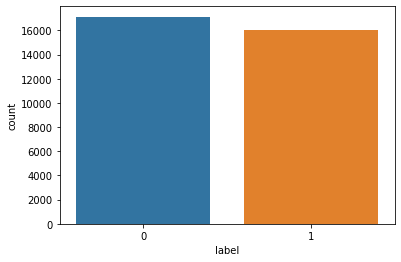

In [101]:
sns.countplot(x = df['label'])

There is almost an even distribution of fake and true news in this dataset. This is good since we would not face the issue of imabalanced dataset which could make our results biased towards a more frequently occuring label. 

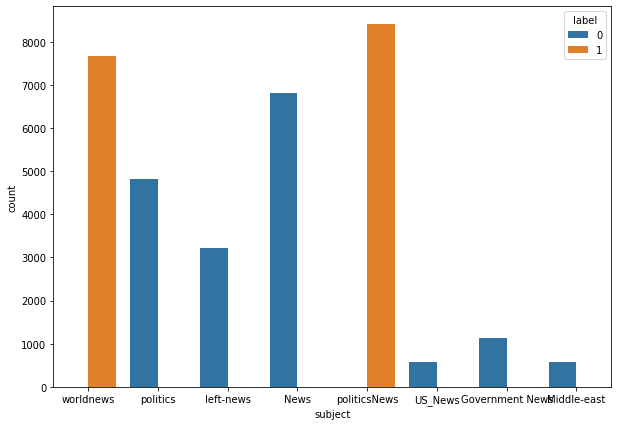

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.countplot(x = df['subject'], hue=df['label'])

We can see that the subjects in the fake and true news are mutually exclusive. Fake news has a variety of subjects while true news only has world news and politics news as subjects with very high count each. We can also see that majority of the news articles in our combined dataset come from the subject of politics news. Furthermore, along with politics news there are 3 more subjects that are related to politics (politics, left-news and Government News). Hence, we can expect to see a lot of words relating to politics in the words analysis of the texts later on. Overall, this dataset is highly biased and not diversified in terms of its subjects, which we can expect to bias our model results and result in very high accuracies.

## Analysis of words in fake news

In [103]:
true_cleaned = df[df["label"]==1]
fake_cleaned = df[df["label"]==0]

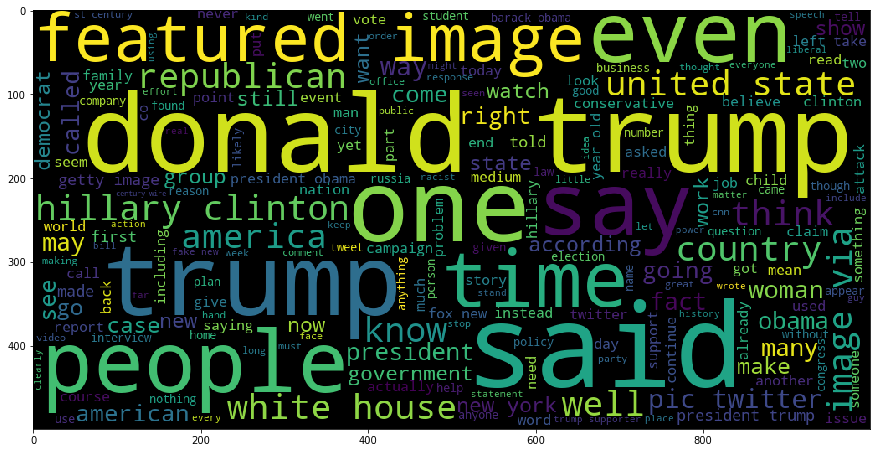

In [104]:
fake_text = " ".join(text for text in fake_cleaned.text_no_source)
fake_text_wordcloud = WordCloud(width = 1000, height = 500).generate(fake_text)
plt.figure(figsize=(15,8))
plt.imshow(fake_text_wordcloud)

In [105]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [106]:
common_words_bi = get_top_n_bigram(fake_cleaned['text_no_source'], 20)

In [107]:
for word, freq in common_words_bi:
    print(word, freq)

donald trump 12191
featured image 6069
hillary clinton 5476
united state 5037
white house 4978
twitter com 4964
image via 4804
pic twitter 4668
new york 3232
president trump 3011
getty image 3008
president obama 2954
fox news 2622
http co 2359
year old 2323
barack obama 1759
st century 1688
read more 1614
trump supporter 1546
fake news 1441


In [108]:
fake_freq_bi = pd.DataFrame(common_words_bi, columns = ['Bi Grams' , 'count'])

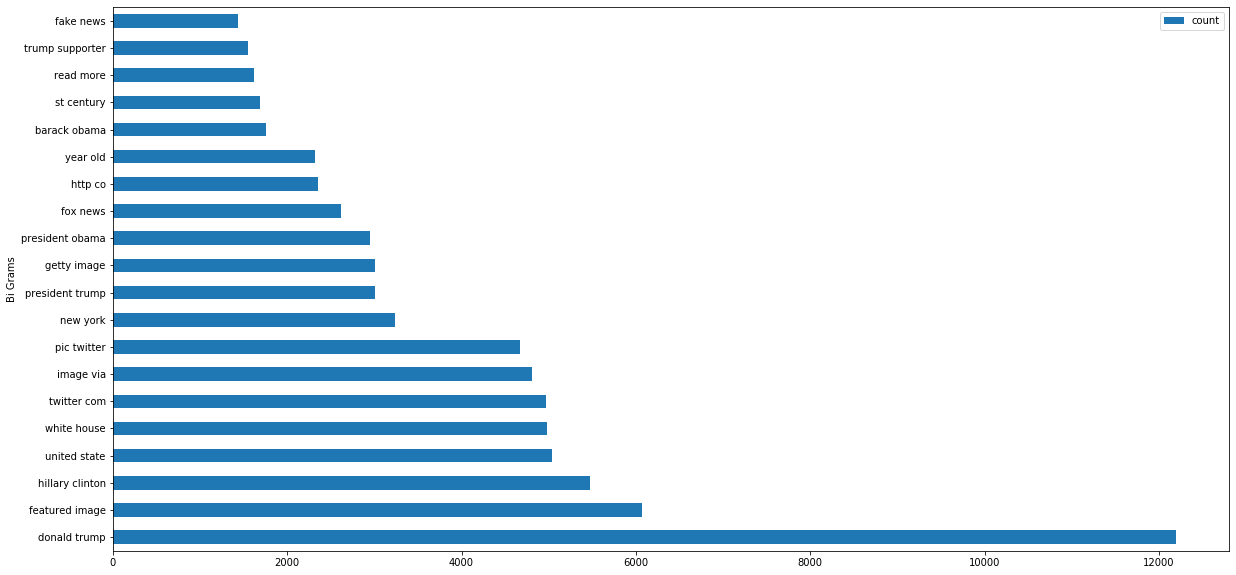

In [109]:
fake_freq_bi.plot.barh(x='Bi Grams', y='count', figsize=(20,10))

## Analysis of words in true news

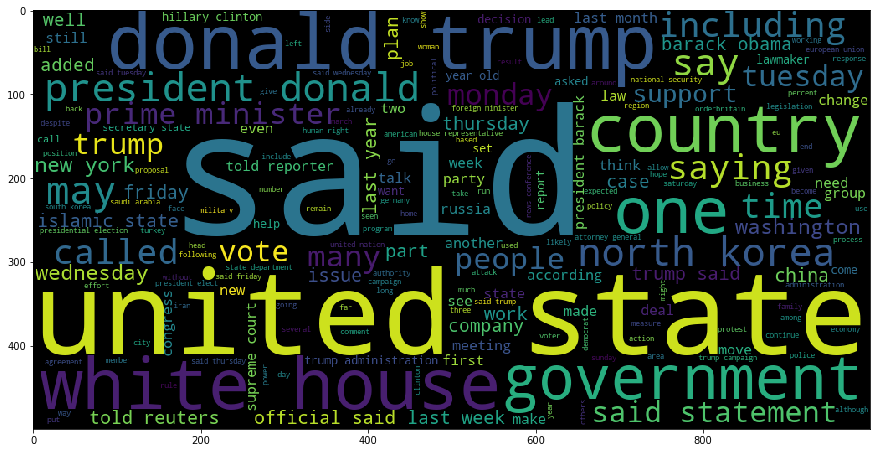

In [110]:
true_text = " ".join(text for text in true_cleaned.text_no_source)
true_text_wordcloud = WordCloud(width = 1000, height = 500).generate(true_text)
plt.figure(figsize=(15,8))
plt.imshow(true_text_wordcloud)

In [111]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [112]:
common_words_bi = get_top_n_bigram(true_cleaned['text_no_source'], 20)

In [113]:
for word, freq in common_words_bi:
    print(word, freq)

united state 9192
donald trump 7510
white house 6338
president donald 4370
north korea 4348
prime minister 3151
said statement 2951
new york 2821
official said 2731
said the 2709
islamic state 2612
told reuters 2606
trump said 2606
last year 2575
last week 2487
barack obama 2478
told reporter 2402
said would 2251
president barack 2201
last month 1922


In [114]:
true_freq_bi = pd.DataFrame(common_words_bi, columns = ['Bi Grams' , 'count'])

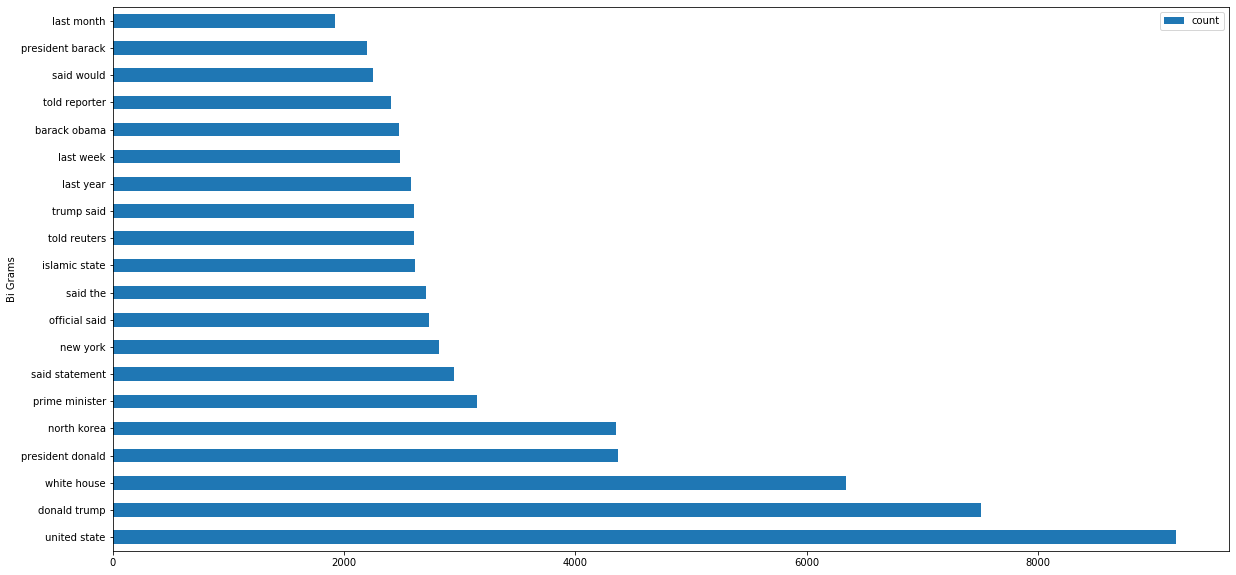

In [115]:
true_freq_bi.plot.barh(x='Bi Grams', y='count', figsize=(20,10))

As expected, from the analysis of the words present in the dataset we can see that this dataset is mostly about political news with the one of the most frequently occuring bigram in both the true and fake news articles being "donald trump". However, we can see that "donald trump" occurs much more frequently in the fake news articles, as not only is the count of that phrase higher, it is also more frequent in proportion to other phrases within the fake news articles. This reveals that fake news articles are more skewed towards reporting about Donald Trump than true news articles. We can also see that true news articles seem to be more diversified as they mention a variety of terms such as "north korea", "islamic state" and "china" while fake news articles revolve more around US related terms. Overall, the dataset seems to contain a lot of words in relation to US and US news hence, our model results may be biased towards US and its news, which may make it harder for the models to distinguish between fake and true news in other subjects such as Middle Eastern news.

# Feature engineering

I have decided to create 3 new features, polarity, word count and length all with respect to the text column in the dataset to gain further insights on the news article texts.

In [116]:
df['polarity_text'] = df['text_no_source'].map(lambda text: TextBlob(text).sentiment.polarity)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


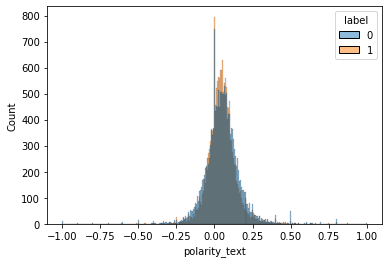

In [117]:
sns.histplot(x=df['polarity_text'], hue=df['label'])

We can see that the polarity distribution is about the same for fake and true news articles. For both news, the mean polarity of the articles is a small positive polarity which means most of the news articles have slightly positive or neutral sentiment. Hence, polarity does not seem to be a distinguishing factor between fake and true news.

In [118]:
df['word_count_text'] = df['text_no_source'].apply(lambda x: len(str(x).split()))

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


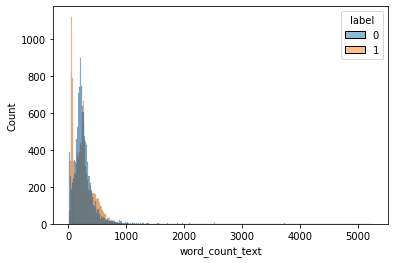

In [119]:
sns.histplot(x=df['word_count_text'], hue=df['label'])

We can see that the word count distribution for the text is similar for fake and true news articles. The most notable difference is that true news seems to have a signifcantly higher count of shorter articles than fake news. Overall, word count also does not seem to be a highly distinguishing factor between fake and true news.

In [120]:
df['word_count_text'].describe()

count    33197.000000
mean       255.947495
std        223.184935
min          1.000000
25%        134.000000
50%        225.000000
75%        318.000000
max       5264.000000
Name: word_count_text, dtype: float64

In [121]:
df['length_text'] = df['text_no_source'].astype(str).apply(len)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


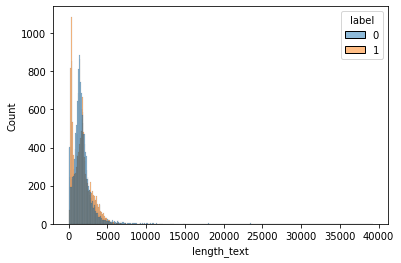

In [122]:
sns.histplot(x=df['length_text'], hue=df['label'])

We can see that the distribution of the length of the news articles is similar for fake and true news articles. The most notable difference is that true news seems to have a signifcantly higher count of shorter articles than fake news. Overall, text length also does not seem to be a highly distinguishing factor between fake and true news.

After cleaning the text column, we can see that the average article text length is about 255 words and the median article text length is 225 words. The longest and shortest news articles are clearly outliers with over 5000 words and only 1 word respectively. For the purpose of building a model, I will standardise by using only using the first 220 words in each article to determine if it is fake or true news.

In [123]:
def shorten_text(text):
    arr = text.split()
    if (len(arr) > 220):
        a = arr[:220]
        return ' '.join(a)
    else:
        return text

In [124]:
df['short_text_no_source'] = df['text_no_source'].apply(lambda x: shorten_text(x))

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
df

,Unnamed: 0,title,text,subject,date,label,source,text_no_source,polarity_text,word_count_text,length_text,short_text_no_source
27793,13824,Candidates and what's at stake in Honduras pre...,TEGUCIGALPA (Reuters) - Hondurans voted Sunday...,worldnews,"November 26, 2017",1,TEGUCIGALPA (Reuters),honduran voted sunday presidential election ma...,0.022564,350,2515,honduran voted sunday presidential election ma...
2903,15052,BREAKING: Biden Won’t Run…Is It Because Biden ...,This announcement seems indicate Obama regime ...,politics,"Oct 21, 2015",0,NaN,this announcement seems indicate obama regime ...,0.084392,202,1409,this announcement seems indicate obama regime ...
16320,21173,"THE NEW SWEDEN: Rapes, Riots, Severed Heads, F...",The consequences throwing welcome mat people i...,left-news,"Jan 2, 2016",0,NaN,the consequence throwing welcome mat people in...,0.018956,1489,10183,the consequence throwing welcome mat people in...
1075,13246,TRUMP GIRLS Give Shout Out To Crooked Hillary…...,Diamond Silk light crowd Trump rally NC. They ...,politics,"Aug 15, 2016",0,NaN,diamond silk light crowd trump rally nc they r...,0.083929,49,322,diamond silk light crowd trump rally nc they r...
12147,2082,Republicans PROVE They Believe In Party Over ...,"Congress chest-deep leak investigations, FBI D...",News,"March 20, 2017",0,NaN,congress chest deep leak investigation fbi dir...,0.014027,226,1524,congress chest deep leak investigation fbi dir...
...,...,...,...,...,...,...,...,...,...,...,...,...
11503,12041,OBAMA INCITING A SECOND COLD WAR? 35 Russian D...,Reuters reports:The United States expelled 35 ...,politics,"Dec 29, 2016",0,NaN,reuters report the united state expelled russi...,-0.007576,115,881,reuters report the united state expelled russi...
8448,22035,SUNDAY SCREENING: ‘The War on Democracy’ (2007),"21st Century Wire says Each week, 21WIRE curat...",US_News,"August 13, 2017",0,NaN,st century wire say each week wire curate seri...,0.080357,111,766,st century wire say each week wire curate seri...
23309,5311,White House delays revamped immigration order ...,WASHINGTON (Reuters) - The White House pushed ...,politicsNews,"February 22, 2017",1,WASHINGTON (Reuters),the white house pushed back release new execut...,0.094205,122,836,the white house pushed back release new execut...
8533,18303,WOW! Do Anti-Trump Protesters REALLY Know What...,Wow! Talk clueless! Austen Fletcher approaches...,left-news,"Jul 17, 2017",0,NaN,wow talk clueless austen fletcher approach ant...,0.159694,121,818,wow talk clueless austen fletcher approach ant...


# Model building

I have decided to use XGBoost, SVM and LSTM as the 3 text classification models. 
<br><br>
XGBoost is an advanced implementation of the gradient boosting algorithm and has proved to be a highly effective ML algorithm. It has high predictive power and is much faster than the other gradient boosting techniques since it uses parallel processing. It also includes a variety of regularization which reduces overfitting and improves overall performance. Moreover, since it is an ensemble learning algorithm it combines the predictions of multiple base learners improving the overall prediction of the model while reducing bias and variance of the predictions.
<br><br>
SVM is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. I chose to use linear SVC as it is good for text classification as text is often linearly separable and it is good for cases where there are a lot of features such as in this case where we have multiple words each of which represent a feature.
<br><br>
LSTM networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. Due to LSTM's ability to learn long term dependencies, it is able to preserve information in texts, hence it is particularly useful for text classification. I have chosen to use a Bidirectional LSTM model to propogate inputs forward and backwards to preserve information from both the past and future to understand context better. I have also chosen to use a spatial dropout layer to help promote independence between feature maps and avoid the issue of overfitting.
<br><br>
Overall, I believe the LSTM model is the most preferred here since it is able to preserve contextual information from the text allowing it to predict the labels of the text better.

In [126]:
x_train, x_test, y_train, y_test = train_test_split(df['short_text_no_source'], df['label'], test_size=0.2, random_state = 1)

In [127]:
tfidf = TfidfVectorizer(stop_words='english')
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [133]:
f1 = []
acc = []
model_name = ['XGBoost', 'SVM', 'LSTM']

accuracy: 0.97877
f1 score: 0.97821


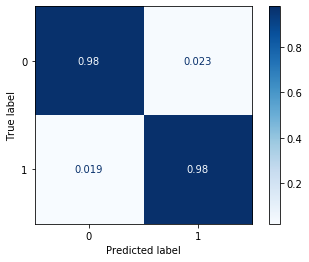

In [138]:
XGB = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

XGBModel = XGB.fit(x_train_tfidf, y_train)

XGBprediction = XGBModel.predict(x_test_tfidf)

print("accuracy: %0.5f" % (accuracy_score(y_test, XGBprediction)))
print("f1 score: %0.5f" % (f1_score(y_test, XGBprediction)))

f1.append(f1_score(y_test, XGBprediction))
acc.append(accuracy_score(y_test, XGBprediction))

plot_confusion_matrix(XGBModel, x_test_tfidf, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

accuracy: 0.97967
f1 score: 0.97911


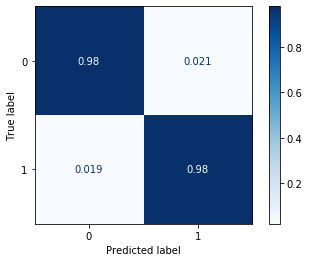

In [141]:
svm = LinearSVC()

SVMmodel = svm.fit(x_train_tfidf, y_train)

SVMprediction = SVMmodel.predict(x_test_tfidf)

print("accuracy: %0.5f" % (accuracy_score(y_test, SVMprediction)))
print("f1 score: %0.5f" % (f1_score(y_test, SVMprediction)))

f1.append(f1_score(y_test, SVMprediction))
acc.append(accuracy_score(y_test, SVMprediction))

plot_confusion_matrix(SVMmodel, x_test_tfidf, y_test, normalize = "true", cmap = "Blues")
plt.show()

In [142]:
# The maximum number of words to be used (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each news text
MAX_SEQUENCE_LENGTH = 220

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['short_text_no_source'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 76390 unique tokens.


In [143]:
X = tokenizer.texts_to_sequences(df['short_text_no_source'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (33197, 220)


In [144]:
Y = df['label'].values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (33197,)


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(23237, 220) (23237,)
(9960, 220) (9960,)


In [146]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 220, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 220, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 5,161,001
Trainable params: 5,161,001
Non-trainable params: 0
_________________________________________________________________
None


In [147]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
327/327 [==============================] - 129s 380ms/step - loss: 0.3350 - accuracy: 0.8477 - val_loss: 0.0594 - val_accuracy: 0.9811
Epoch 2/5
327/327 [==============================] - 129s 396ms/step - loss: 0.1487 - accuracy: 0.9533 - val_loss: 0.0478 - val_accuracy: 0.9854
Epoch 3/5
327/327 [==============================] - 125s 383ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0484 - val_accuracy: 0.9849
Epoch 4/5
327/327 [==============================] - 127s 387ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.0420 - val_accuracy: 0.9815
Epoch 5/5
327/327 [==============================] - 124s 380ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0405 - val_accuracy: 0.9867


In [148]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

312/312 [==============================] - 15s 47ms/step - loss: 0.0574 - accuracy: 0.9846
Test set
  Loss: 0.057
  Accuracy: 0.985


In [149]:
LSTMprediction = model.predict_classes(X_test)

f1.append(f1_score(Y_test, LSTMprediction))
acc.append(accuracy_score(Y_test, LSTMprediction))

/Users/eramalam/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [150]:
results = {'Models': model_name, 'F1_scores': f1, 'Accuracies': acc}
results = pd.DataFrame(results)

In [151]:
results

,Models,F1_scores,Accuracies
0,XGBoost,0.978210,0.978765
1,SVM,0.979112,0.979669
2,LSTM,0.984127,0.984639


We can see that overall LSTM has indeed performed the best among the 3 chosen models.